# National Anthems Analysis

**Description:** Interactive visualization that displays...

- Isaac Cortés
- Abhay
- Rey
- Danny
- Janki

In [1]:
# If you guys do not have the libraries you can uncomment and run this lines
#import sys
#!{sys.executable} -m pip install pandas numpy pycountry wordcloud

In [2]:
import pandas as pd
import numpy as np
import pycountry as pc
import re
import base64
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In [3]:
# Importing our data set
df = pd.read_csv('datasets/anthems.csv',usecols=['nation','url','lyrics_englishtransliteration','lyrics_english','image'])

# Renaming the columns for easier manipulation
df.rename(columns={'nation':'country','lyrics_englishtransliteration':'transliteration','lyrics_english':'english'},
          inplace=True)

In [4]:
# Exploring our data
df.head()

,country,url,transliteration,english,image
0,abkhazia,https://youtu.be/1F-YWu-ucB8,"Šwnejbac, šwnejbac,\nApsuaa ryč̣ḳwyncwa.\nApsn...","March on, march on,\nsons of Abkhazia!\nShed o...",iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAA...
1,Afghanistan,https://youtu.be/z_eiu2cOIRk,"Dā watan Afghānistān day, dā izat də har Afghā...","This land is Afghanistan, it is the pride of e...",/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAYEBAQFBAYFBQ...
2,Albania,https://youtu.be/STtkicwuzlQ,Rreth flamurit të përbashkuar Me një dëshir' e...,"Around our flag we stand united,\nWith one wis...",iVBORw0KGgoAAAANSUhEUgAAAIwAAABkCAIAAADbtU+GAA...
3,Algeria,https://youtu.be/7fRAwtLL5Jw,Qasaman binnazilat ilmahiqat Waddima' izzakiya...,"We swear by the lightning that destroys,\nBy t...",iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAIAAADrOV6nAA...
4,Andorra,https://youtu.be/bRGoJlPaIXA,"El gran Carlemany, mon pare, dels alarbs em de...","The great Charlemagne, my father, from the Sar...",iVBORw0KGgoAAAANSUhEUgAAAI8AAABkCAIAAAAwgvSFAA...


In [5]:
# Looking for missing values
for col in df.columns:
    if df[col].isnull().values.any():
        print(f"Column \"{col}\" contains {df[col].isnull().sum()} NaNs.")

Column "image" contains 1 NaNs.


In [6]:
df[df['image'].isna()]

,country,url,transliteration,english,image
104,Mali,https://youtu.be/DE4iClNU24o,A ton appel Mali Pour ta prospérité Fidèle à t...,"At your call, Mali For your prosperity Loyal t...",NaN


In [7]:
# Remove parenthesis abbreviations
# E.g. United States of America (USA) -> United States of America

def remove_abbr(row):
    country = row['country']
    regx = r'\s\(.*\)'
    row['country'] = re.sub(regx, '', country)        
    return row

df = df.apply(remove_abbr,axis=1)

In [8]:
# Adding alpha codes
# E.g. Brazil -> BRA

def alpha_codes(row):
    country = pc.countries.get(name=row['country'])
    
    # If the country name in the data set gives a direct result, add it
    if pc.countries.get(name=row['country']) is not None:
        alpha_3 = country.alpha_3
    else:
        # If not then try a fuzzy search
        try:
            search_res = pc.countries.search_fuzzy(row['country'])
            alpha_3 = search_res[0].alpha_3
        except LookupError:
            alpha_3 = ''
            print(f"{row['country']} not found")
        
    row['alpha3'] = alpha_3
    return row

# Two specific cases:
df.replace({'Laos':'Lao','Congo, Democratic Republic of the':'Congo, The Democratic Republic of the'},inplace=True)

# Applying the alpha codes
df = df.apply(alpha_codes,axis=1)
print(f"Number of countries without alpha codes: {len(df[df['alpha3'] == ''])}")

Number of countries without alpha codes: 0


In [9]:
# Exporting clean dataframe
df.to_csv('datasets/clean_anthems.csv')

# Creating the wordcloud

### Getting the flag image

<div class="alert alert-block alert-warning">

<b>Note:</b> The images that are generated from the data set base64 string might not be the right size to create the wordclous, in that case we might need to **resize the image with Python** or  use the API (https://www.countryflagsapi.com/).

    
</div>

Record #80 is: Israel ISR


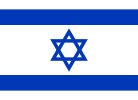

In [10]:
def decode_flag(encoded_data):
    decoded_data = base64.b64decode((encoded_data))
    flag = open('flag.jpeg', 'wb')
    flag.write(decoded_data)
    flag.close()
    
    
from IPython.display import Image as DisplayImage
import random

rand = random.randrange(len(df))
country = df['image'][rand]
decode_flag(country)

print(f"Record #{rand} is: {df['country'][rand]} {df['alpha3'][rand]}")
DisplayImage(filename='flag.jpeg') 

### Coding the wordcloud

Country: italy
Brothers of Italy, Italy has woken, bound Scipio's helmet Upon her head. Where is Victory? Let her bow down, Because [as a] slave of Rome God created her. Let us join in a cohort, we are ready to die. We are ready to die, Italy has called. Let us join in a cohort, We are ready to die. We are ready to die, Italy has called! Yes! We were for centuries downtrodden, derided, because we are not one people, because we are divided. Let one flag, one hope gather us all. The hour has struck for us to unite. Let us unite, let us love one another, Union and love Reveal to the peoples The ways of the Lord. Let us swear to set free The land of our birth: United, by God, Who can overcome us? Let us join in a cohort, we are ready to die. We are ready to die, Italy has called. Let us join in a cohort, We are ready to die. We are ready to die, Italy has called! Yes! From the Alps to Sicily, Legnano is everywhere; Every man has the heart and hand of Ferruccio The children of Italy Are all

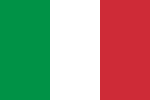

In [11]:
# Search 
search = input("Country: ")
search_res = pc.countries.search_fuzzy(search)
country = search_res[0].alpha_3

idx = df.index[df['alpha3'] == country].tolist()[0]
anthem = df['english'][idx]
decode_flag(df['image'][idx])

print(anthem)
DisplayImage(filename='flag.jpeg') 

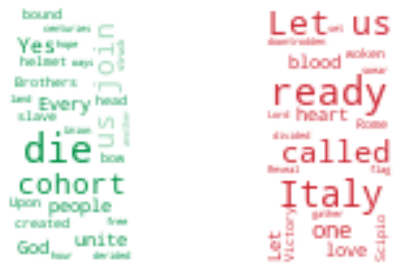

In [12]:
# Example followed: https://www.datacamp.com/tutorial/wordcloud-python

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Get stopwords from WordCloud library
stopwords = set(STOPWORDS)
# Add words to the stopwords list
stopwords.update(["neword"])

mask = np.array(Image.open("flag.jpeg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(anthem)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")